In [24]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabaz_score as ch
import numpy as np

import random

import seaborn as sns
sns.set()
%config InlineBackend.figure_format ='retina'

%cd ..
from LWEA import LWEA

In [102]:
x, _ = datasets.make_moons(n_samples=200, shuffle=False, noise=0.03, random_state=42)
df = pd.DataFrame(x).rename(columns={0:"x", 1:"y"})

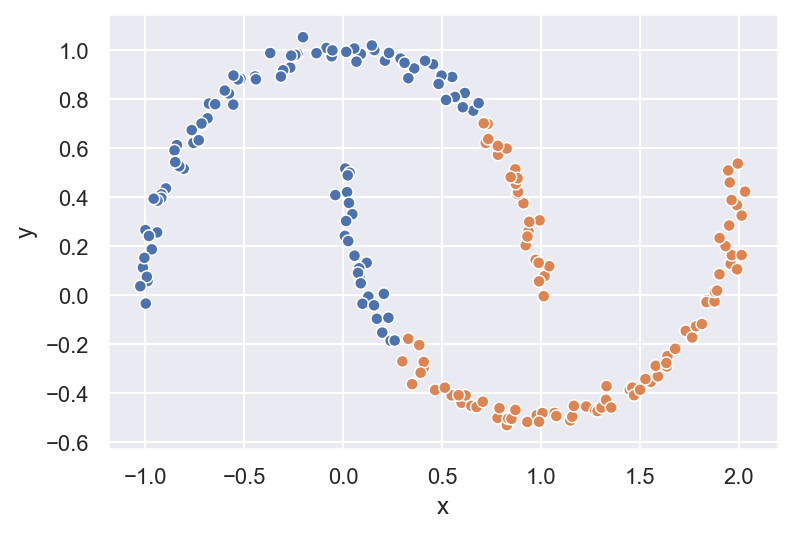

In [103]:
labels_kmeans = KMeans(2).fit_predict(df)
sns.scatterplot(x=df.x, y=df.y, hue=labels_kmeans, legend=False)

In [134]:
def lwea(X, k):
    labels_ensemble = np.array([KMeans(n_clusters=2).fit_predict(X) for _ in range(20)])
    
    bcs, segments = LWEA.get_all_segs(labels_ensemble.T)
    ECI = LWEA.compute_ECI(bcs, segments)
    ca = LWEA.compute_LWCA(segments, ECI, bcs.shape[1])
    
    labels = LWEA.LWEA(ca, k)
    return labels

In [135]:
labels = lwea(df.values, 2)

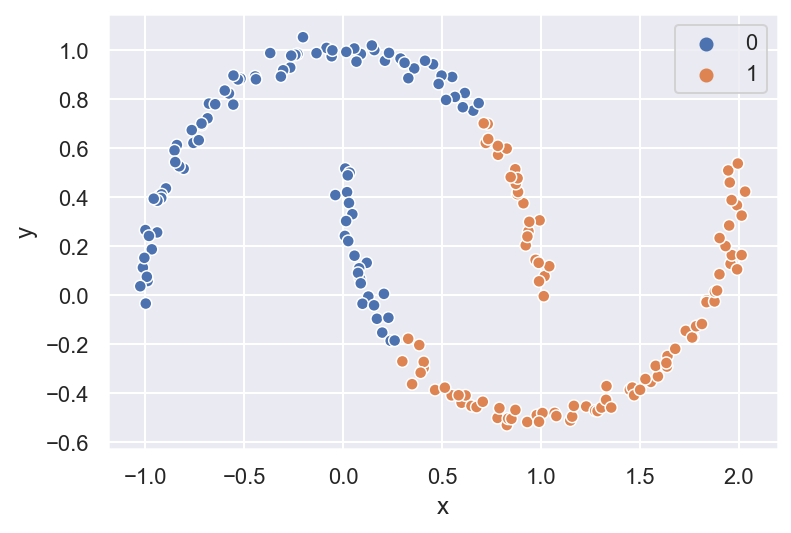

In [136]:
sns.scatterplot(df.x, df.y, hue=labels)

In [137]:
blobs, _ = datasets.make_blobs(200, centers=2, shuffle=False, random_state=42)

In [138]:
labels = lwea(blobs, 2)

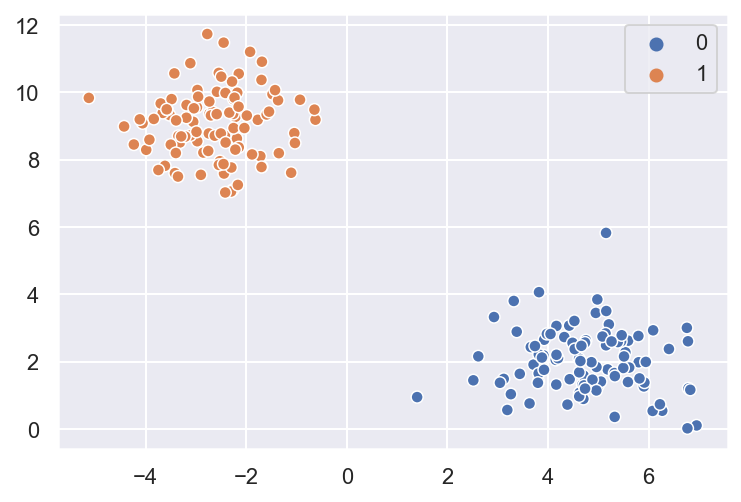

In [139]:
sns.scatterplot(blobs[:, 0], blobs[:,1],hue=labels)